# Condiciones de muestreo de los propagadores

## Funcion chirp

Tanto la funcion de transferencia como la funcion respuesta al impulso de la transformada de Fresnel son funciones de fase que varian con el cuadrado de las coordenadas, conocidas como funciones chirp.

$h(x,y)=\frac{e^{jkz}}{j\lambda } e^{\frac{jk}{2z} (x^2+y^2)}$

$H(f_x,f_y)=e^{jkz} e^{-j \pi \lambda z (f_x^2+f_y^2)}$

Veamos primero como se comportan este tipo de funciones

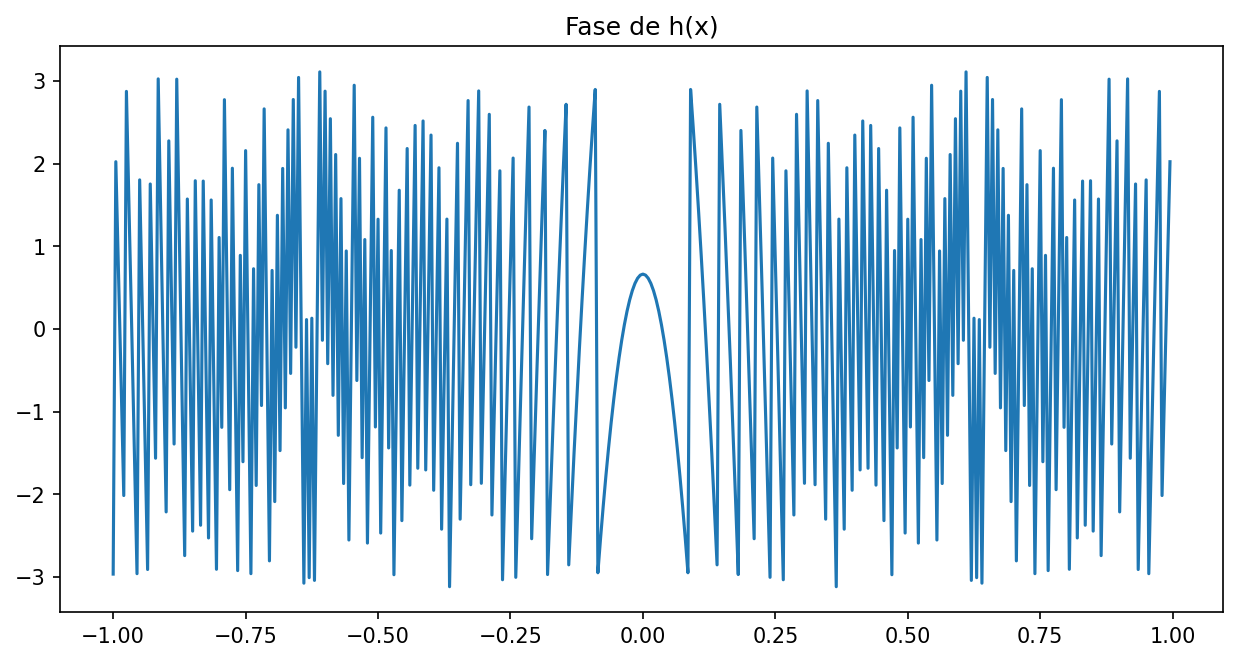

In [ ]:
import numpy as np
import scipy.fft as sft
import matplotlib.pyplot as plt

L=2
M=400
dx=L/M
a=500



x=np.linspace(-L/2, L/2-dx,M)
y=np.linspace(-L/2, L/2-dx,M)

xx, yy= np.meshgrid(x,y)

h=np.exp(-1j*a*(xx**2+yy**2))

plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure(dpi=150)

plt.plot(x,np.angle(h)[100,:])
plt.title('Fase de h(x)')
plt.show()

El intervalo de muestreo critico es:  0.0266
El numero de muestras critico es:  75.18796992481204


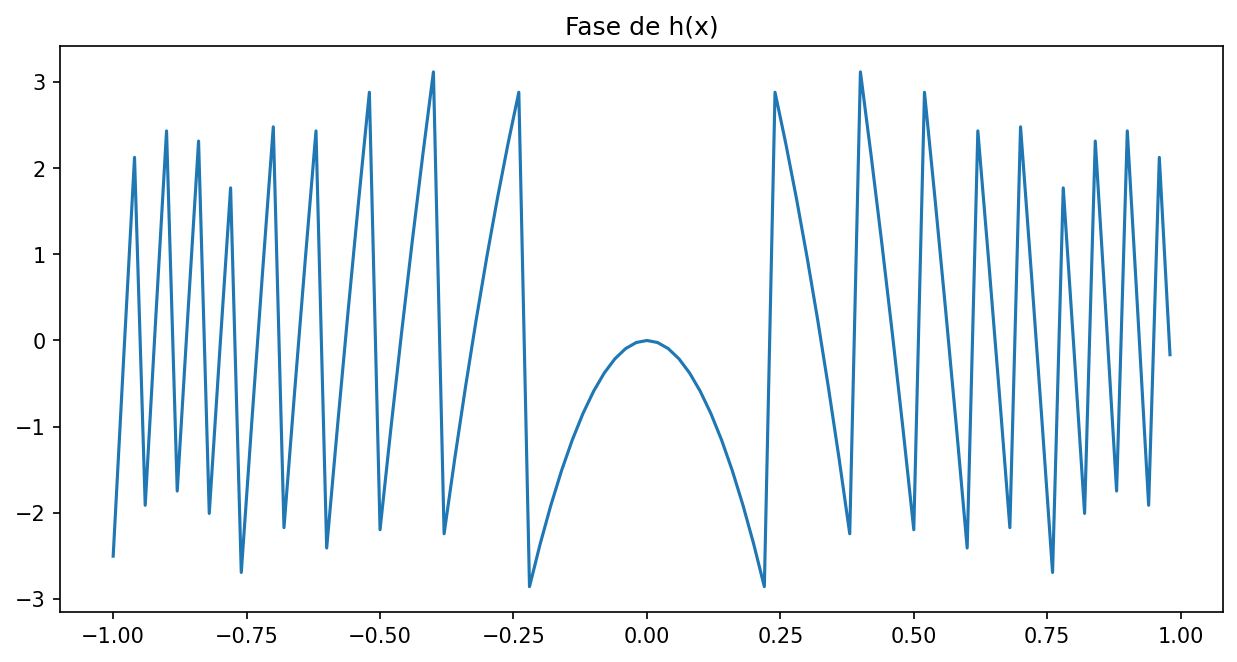

In [ ]:
L=2
M=100
dx=L/M
wl=532E-4
z=1

dxc=z*wl/L
Mc=L/dxc

print('El intervalo de muestreo critico es: ',dxc)
print('El numero de muestras critico es: ',Mc)
x=np.linspace(-L/2, L/2-dx,M)
y=np.linspace(-L/2, L/2-dx,M)

xx, yy= np.meshgrid(x,y)

h=np.exp(-1j*(np.pi/(z*wl))*(xx**2+yy**2))

plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure(dpi=150)

plt.plot(x,np.angle(h)[int(M/2),:])
plt.title('Fase de h(x)')
plt.show()

## Ejemplo condiciones de muestreo

A continuacion veremos ejemplos de las condiciones de muestreo. Para esto primero definiremos funciones para realizar la propagacion por funcion de transferencia y respuesta al impulso.

In [ ]:
def ftfresnel(M,N,dx,wl,z):
    
    """
    Esta funcion genera una funcion de transferencia  de tamaño (n,m) para la transformada de fresnel con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa determina si se genera la funcion de transferencia directamente.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    FX,FY=np.meshgrid(fx,fy)
    H=np.exp(-1j*wl*z*np.pi*(FX**2+FY**2))
    H=sft.fftshift(H)
    return H

def irfresnel(M,N,dx,wl,z):
    
    """
    Esta funcion genera una funcion de tranfserencia  de tamaño (n,m) para la transformada de fresnel con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa genera la funcion de transferencia por medio de la respuesta al impulso en base a los paramtros introducidos.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    X,Y=np.meshgrid(x,y)
    h=(1/(1j*wl*z))*np.exp(1j*k/(2*z)*(X**2+Y**2))
    H=sft.fft2(sft.fftshift(h))*(dx**2)  
    return H

def convft(U,H,dx):
    """
    Realiza la convolucion 2D de las matrices U,H usando la transformada rapida de Fourier. U, H deben tener la misma forma.
    
    Parameters
    ----------
    U : Array Numpy
        Uno de las matrices a convolucionar
    H : Array Numpy
        Otra de las matrices a convolucionar
    dx : Float
        Tamaño de muestreo de las funciones a convolucionar. Necesario para preservar escala.

    Returns
    -------
    U2
        Arreglo de numpy con la convolucio de U y H

    """
    U2=sft.fft2(sft.fftshift(U))*(dx**2)
    U2=H*U2
    U2=sft.ifftshift(sft.ifft2(U2)*(1/dx**2))
    return U2

Ahora probemos con una funcion rect y una funcion rejilla periodica

El intervalo de muestreo critico es:  4.9999999999999996e-06
El numero de muestras critico es:  100000.00000000001
La distancia critica es:  2000.0000000000002
El ancho de banda de la fuente es:  98.03921568627452


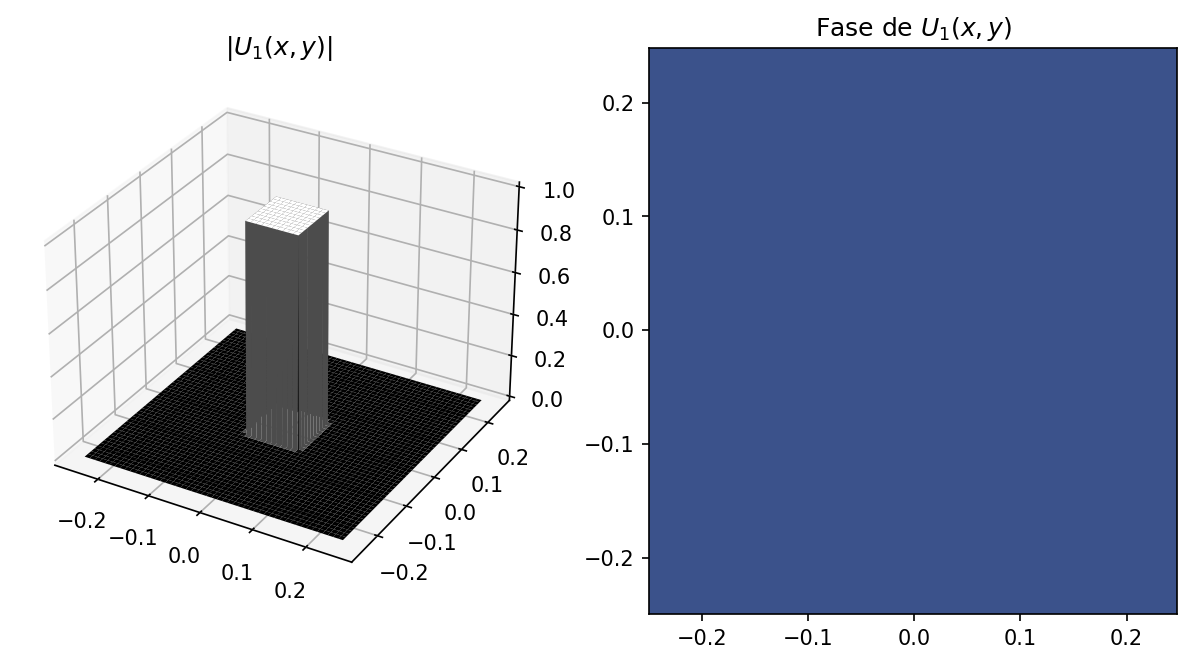

In [ ]:
def rect2D(x,y):
    n=len(x)
    m=len(y)
    R1=np.zeros([1,n])
    R2=np.zeros([1,n])
    R1[0,x>-1/2]=1
    R2[0,x<1/2]=1
    Rx=R1*R2
    R1=np.zeros([1,m])
    R2=np.zeros([1,m])
    R1[0,y>-1/2]=1
    R2[0,y<1/2]=1
    Ry=R1*R2
    return Rx.T@Ry


L=0.5
M=250.
dx=L/M
wl=0.5E-6
z=5.
w=0.051
dxc=z*wl/L
Mc=L/dxc
zc=dx*L/wl

x1=np.linspace(-L/2, L/2-dx,int(M))
y1=np.linspace(-L/2, L/2-dx,int(M))
xx1, yy1= np.meshgrid(x1,y1)

x2=x1
y2=y1
xx2, yy2 = np.meshgrid(x2,y2);


print('El intervalo de muestreo critico es: ',dxc)
print('El numero de muestras critico es: ',Mc)
print('La distancia critica es: ',zc)

u1=rect2D(x1/(2*w),y1/(w*2))

B1=5/w

print('El ancho de banda de la fuente es: ', B1)


plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(xx1,yy1,np.abs(u1),cmap='gray')
ax.title.set_text('$|U_1(x,y)|$')

ax = fig.add_subplot(1, 2,2)
ax.contourf(xx1,yy1,np.angle(u1))
ax.title.set_text('Fase de $U_1(x,y)$')
plt.show()

Ancho de banda maximo para z=20000 : 25.0


<Figure size 1500x750 with 0 Axes>

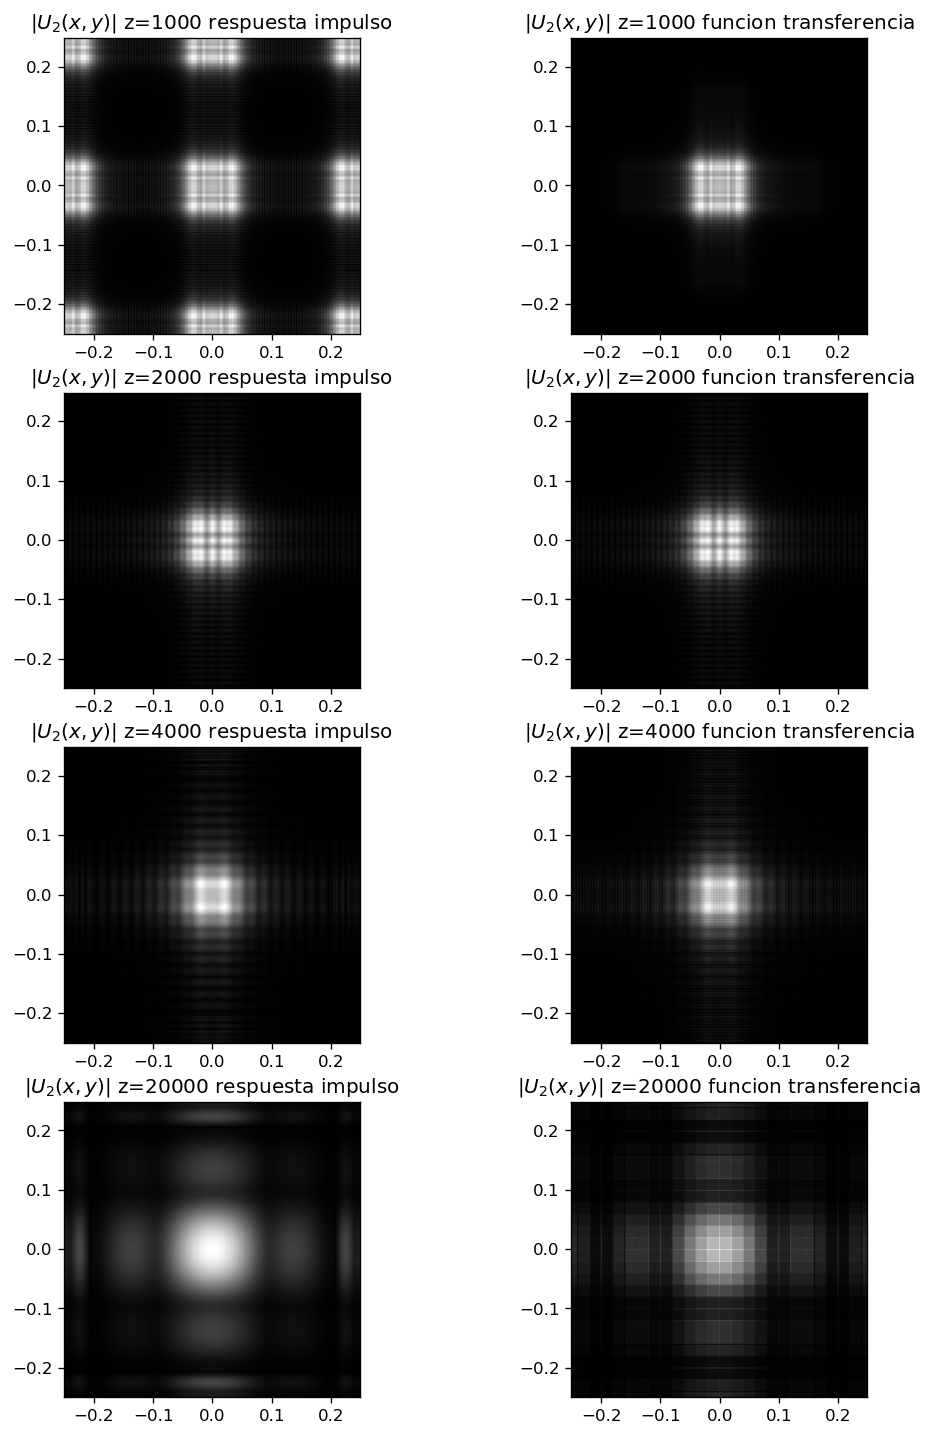

In [ ]:
#Creamos la funcion de transferencia por respuesta al impulso

z1=1000
z2=2000
z3=4000
z4=20000

Hirz1=irfresnel(M,M,dx,wl,z1)
Hftz1=ftfresnel(M,M,dx,wl,z1)
Hirz2=irfresnel(M,M,dx,wl,z2)
Hftz2=ftfresnel(M,M,dx,wl,z2)

Hirz3=irfresnel(M,M,dx,wl,z3)
Hftz3=ftfresnel(M,M,dx,wl,z3)
Hirz4=irfresnel(M,M,dx,wl,z4)
Hftz4=ftfresnel(M,M,dx,wl,z4)

u2irz1=convft(u1,Hirz1,dx)
u2irz2=convft(u1,Hirz2,dx)
u2irz3=convft(u1,Hirz3,dx)
u2irz4=convft(u1,Hirz4,dx)

u2ftz1=convft(u1,Hftz1,dx)
u2ftz2=convft(u1,Hftz2,dx)
u2ftz3=convft(u1,Hftz3,dx)
u2ftz4=convft(u1,Hftz4,dx)

Bz4=L/(2*wl*z4)
print('Ancho de banda maximo para z=20000 :',Bz4)


plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure(dpi=150)


plt.rcParams['figure.figsize'] = 10,15

fig = plt.figure(dpi=120)

ax = fig.add_subplot(4, 2, 1)
ax.imshow(np.abs(u2irz1)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=1000 respuesta impulso')
ax = fig.add_subplot(4, 2,2)
ax.imshow(np.abs(u2ftz1)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=1000 funcion transferencia')


ax = fig.add_subplot(4, 2, 3)
ax.imshow(np.abs(u2irz2)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=2000 respuesta impulso')
ax = fig.add_subplot(4, 2, 4)
ax.imshow(np.abs(u2ftz2)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=2000 funcion transferencia')

ax = fig.add_subplot(4, 2, 5)
ax.imshow(np.abs(u2irz3)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=4000 respuesta impulso')
ax = fig.add_subplot(4, 2, 6)
ax.imshow(np.abs(u2ftz3)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=4000 funcion transferencia')

ax = fig.add_subplot(4, 2, 7)
ax.imshow(np.abs(u2irz4)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=20000 respuesta impulso')
ax = fig.add_subplot(4, 2, 8)
ax.imshow(np.abs(u2ftz4)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=20000 funcion transferencia')

plt.show()





Ahora veremos la limitacion en las frecuencias para las distancias largas

El intervalo de muestreo critico es:  0.133
El numero de muestras critico es:  15.037593984962406
La distancia critica es:  0.1468515037593985


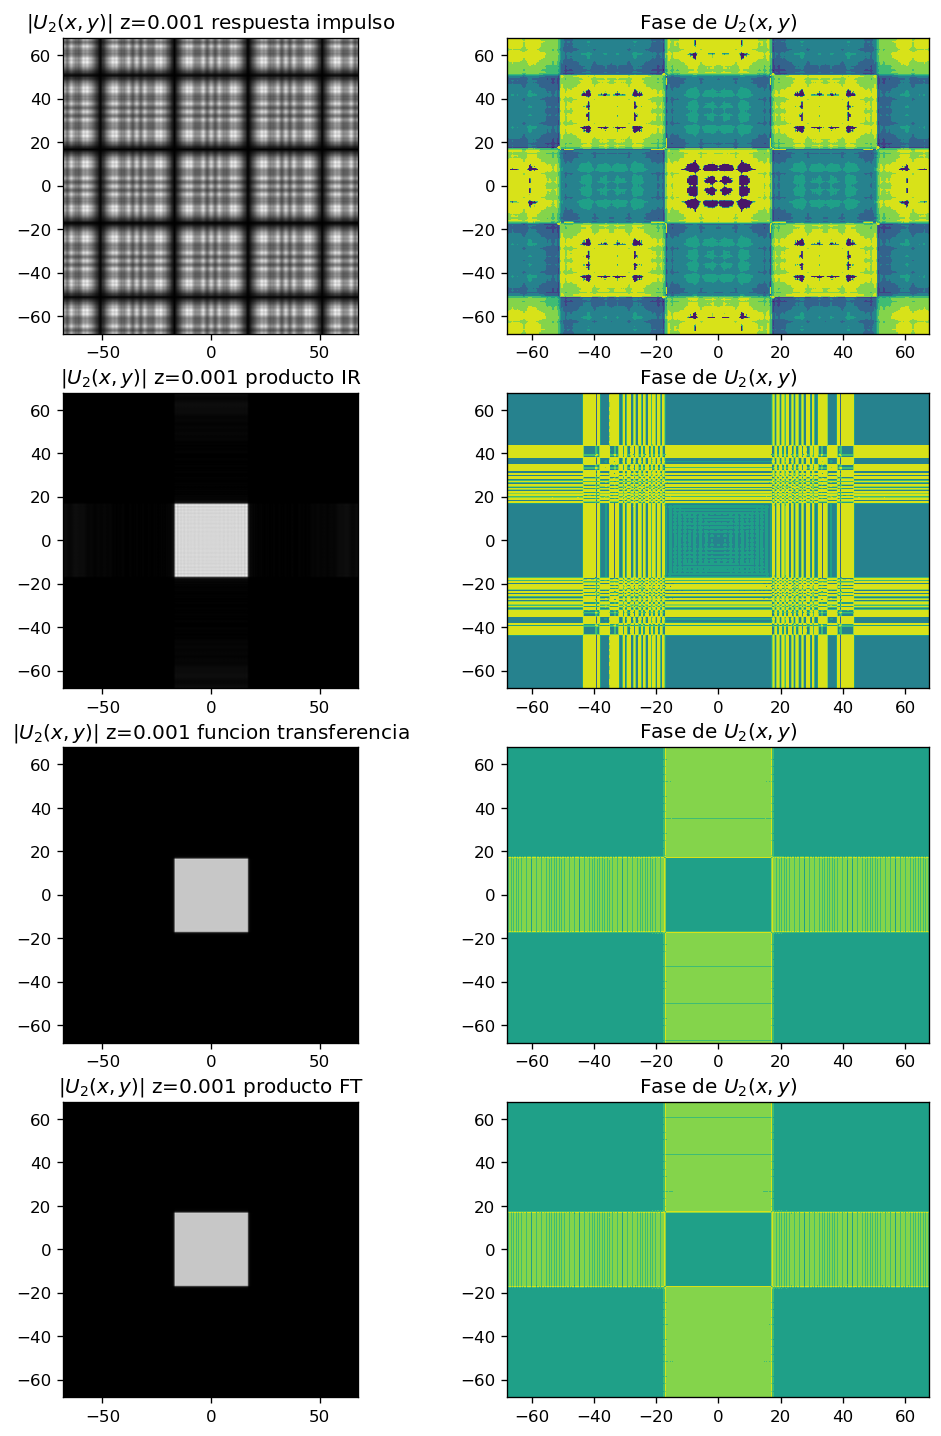

In [ ]:
z1=0.400
z2=0.399
z3=0.001

L=2.
M=512.
dx=L/M
wl=532E-4
z=5.
dxc=z*wl/L
Mc=L/dxc
zc=dx*L/wl

H1=irfresnel(M,M,dx,wl,z1)
H2=irfresnel(M,M,dx,wl,-z2)
H3=irfresnel(M,M,dx,wl,z3)
H4=ftfresnel(M,M,dx,wl,z3)
H5=ftfresnel(M,M,dx,wl,z1)
H6=ftfresnel(M,M,dx,wl,-z2)
HT=H1*H2
HT2=H5*H6

x1=np.linspace(-L/2, L/2-dx,int(M))
y1=np.linspace(-L/2, L/2-dx,int(M))
xx1, yy1= np.meshgrid(x1,y1)

x2=x1*(wl*z/dx)
y2=y1*(wl*z/dx)
xx2, yy2 = np.meshgrid(x2,y2);


print('El intervalo de muestreo critico es: ',dxc)
print('El numero de muestras critico es: ',Mc)
print('La distancia critica es: ',zc)

u1=rect2D(x1/0.5,y1/0.5)


u2a=convft(u1,H3,dx)
u2b=convft(u1,HT,dx)
u2c=convft(u1,H4,dx)
u2d=convft(u1,HT2,dx)


plt.rcParams['figure.figsize'] = 10,15

fig = plt.figure(dpi=120)
ax = fig.add_subplot(4, 2, 1)
ax.imshow(np.abs(u2a)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])

ax.title.set_text('$|U_2(x,y)|$ z=0.001 respuesta impulso')

ax = fig.add_subplot(4, 2,2)
ax.contourf(xx2,yy2,np.angle(u2a))
ax.title.set_text('Fase de $U_2(x,y)$')


ax = fig.add_subplot(4, 2, 3)
ax.imshow(np.abs(u2b)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])

ax.title.set_text('$|U_2(x,y)|$ z=0.001 producto IR')

ax = fig.add_subplot(4, 2,4)
ax.contourf(xx2,yy2,np.angle(u2b))
ax.title.set_text('Fase de $U_2(x,y)$')

ax = fig.add_subplot(4, 2, 5)
ax.imshow(np.abs(u2c)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])

ax.title.set_text('$|U_2(x,y)|$ z=0.001 funcion transferencia')

ax = fig.add_subplot(4, 2,6)
ax.contourf(xx2,yy2,np.angle(u2c))
ax.title.set_text('Fase de $U_2(x,y)$')

ax = fig.add_subplot(4, 2, 7)
ax.imshow(np.abs(u2d)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])

ax.title.set_text('$|U_2(x,y)|$ z=0.001 producto FT')

ax = fig.add_subplot(4, 2,8)
ax.contourf(xx2,yy2,np.angle(u2d))
ax.title.set_text('Fase de $U_2(x,y)$')

plt.show()

## Propagadores Exactos

Ahora definamos los propagadores basados en la solucion de Rayleigh-Sommerfeld sin la aproximacion paraxial.

In [ ]:
def ASft(M,N,dx,wl,z):
    
    """
    Esta funcion genera una funcion de transferencia  de tamaño (n,m) para la propagacion exacta con espectro angular con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa determina si se genera la funcion de transferencia directamente.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    FX,FY=np.meshgrid(fx,fy)
    H=np.exp(1j*(z/wl)*2*np.pi*np.sqrt(1-(wl*FX)**2-(wl*FY)**2))
    H[np.sqrt(FX**2+FY**2)>(1/wl)]=0
    H=sft.fftshift(H)
    return H

def RayleighIR(M,N,dx,wl,z):
    
    """
    Esta funcion genera una funcion de tranfserencia  de tamaño (n,m) para la propagacion exacta con respuesta al impulso de Rayleigh-Sommerfeld
    con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa genera la funcion de transferencia por medio de la respuesta al impulso en base a los paramtros introducidos.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    X,Y=np.meshgrid(x,y)
    h=(z/(wl*1j))*(np.exp(1j*k*np.sqrt(z**2+X**2+Y**2)))/(z**2+X**2+Y**2)
    H=sft.fft2(sft.fftshift(h))*(dx**2)  
    return H

Probemoslos propagando un cuadrado

El intervalo de muestreo critico es:  4.9999999999999996e-06
El numero de muestras critico es:  100000.00000000001
La distancia critica es:  2000.0000000000002
Ancho de banda maximo para z=2000 : 25.0


<Figure size 1500x750 with 0 Axes>

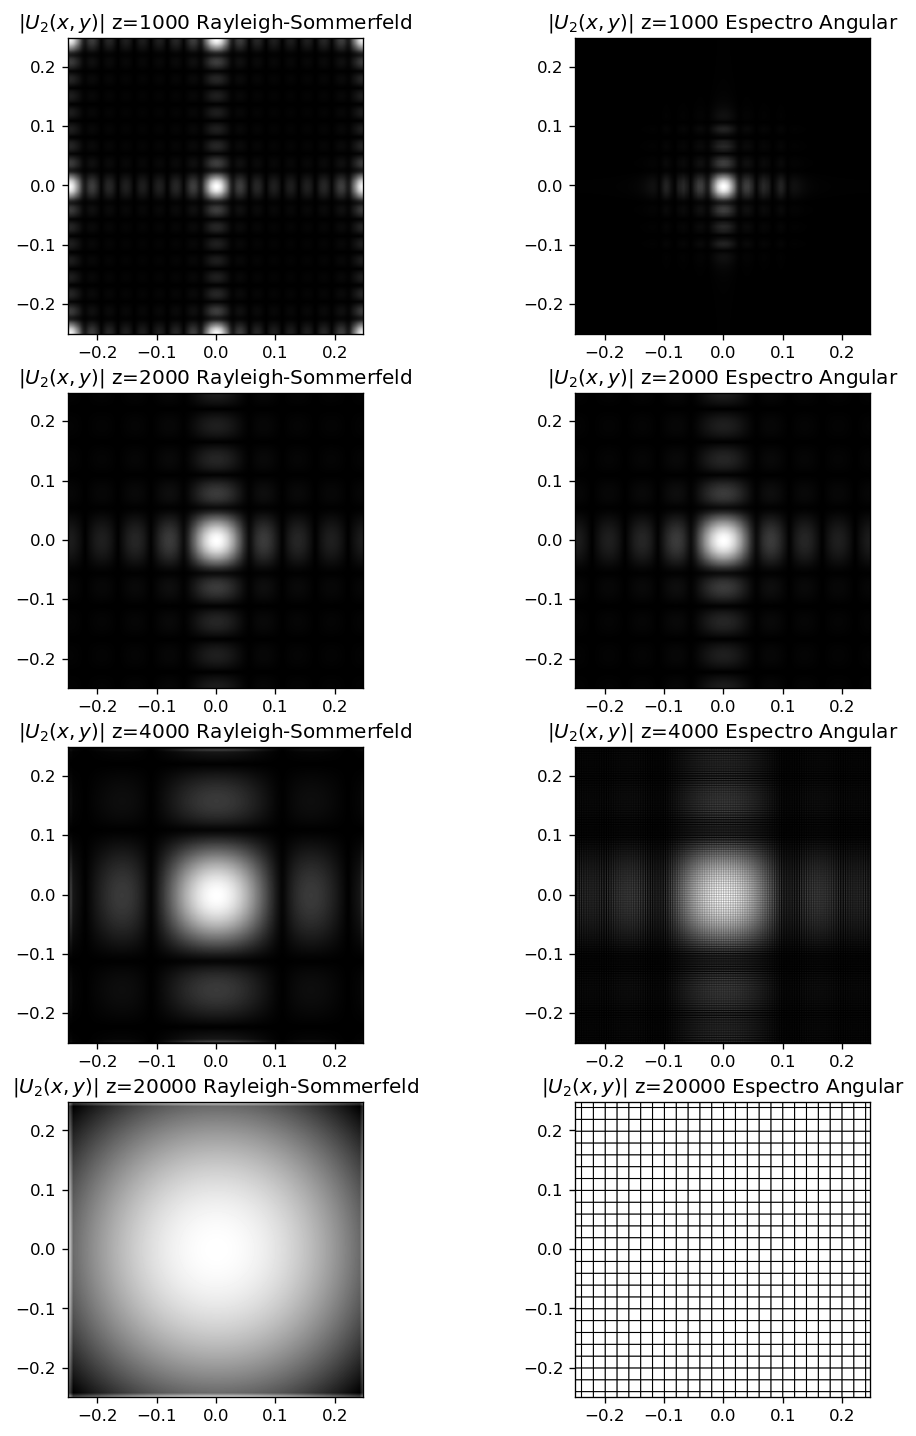

In [ ]:
L=0.5
M=250.
dx=L/M
wl=0.5E-6
z=5.
w=0.01
dxc=z*wl/L
Mc=L/dxc
zc=dx*L/wl

x1=np.linspace(-L/2, L/2-dx,int(M))
y1=np.linspace(-L/2, L/2-dx,int(M))
xx1, yy1= np.meshgrid(x1,y1)

x2=x1
y2=y1
xx2, yy2 = np.meshgrid(x2,y2);


print('El intervalo de muestreo critico es: ',dxc)
print('El numero de muestras critico es: ',Mc)
print('La distancia critica es: ',zc)

u1=rect2D(x1/(2*w),y1/(w*2))

#Creamos la funcion de transferencia por respuesta al impulso

z1=1000
z2=2000
z3=4000
z4=20000

Hirz1=RayleighIR(M,M,dx,wl,z1)
Hftz1=ASft(M,M,dx,wl,z1)
Hirz2=RayleighIR(M,M,dx,wl,z2)
Hftz2=ASft(M,M,dx,wl,z2)
Hirz3=RayleighIR(M,M,dx,wl,z3)
Hftz3=ASft(M,M,dx,wl,z3)
Hirz4=RayleighIR(M,M,dx,wl,z4)
Hftz4=ftfresnel(M,M,dx,wl,z4)

u2irz1=convft(u1,Hirz1,dx)
u2irz2=convft(u1,Hirz2,dx)
u2irz3=convft(u1,Hirz3,dx)
u2irz4=convft(u1,Hirz4,dx)

u2ftz1=convft(u1,Hftz1,dx)
u2ftz2=convft(u1,Hftz2,dx)
u2ftz3=convft(u1,Hftz3,dx)
u2ftz4=convft(u1,Hftz4,dx)

Bz4=L/(2*wl*z4)
print('Ancho de banda maximo para z=2000 :',Bz4)


plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure(dpi=150)


plt.rcParams['figure.figsize'] = 10,15

fig = plt.figure(dpi=120)

ax = fig.add_subplot(4, 2, 1)
ax.imshow(np.abs(u2irz1)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=1000 Rayleigh-Sommerfeld')
ax = fig.add_subplot(4, 2,2)
ax.imshow(np.abs(u2ftz1)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=1000 Espectro Angular')


ax = fig.add_subplot(4, 2, 3)
ax.imshow(np.abs(u2irz2)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=2000 Rayleigh-Sommerfeld')
ax = fig.add_subplot(4, 2, 4)
ax.imshow(np.abs(u2ftz2)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=2000 Espectro Angular')

ax = fig.add_subplot(4, 2, 5)
ax.imshow(np.abs(u2irz3)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=4000 Rayleigh-Sommerfeld')
ax = fig.add_subplot(4, 2, 6)
ax.imshow(np.abs(u2ftz3)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=4000 Espectro Angular')

ax = fig.add_subplot(4, 2, 7)
ax.imshow(np.abs(u2irz4)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=20000 Rayleigh-Sommerfeld')
ax = fig.add_subplot(4, 2, 8)
ax.imshow(np.abs(u2ftz4)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=20000 Espectro Angular')

plt.show()

## Principio de Babinet 

Para verificar la operacion de los propagadores, una prueba util es que cumplan el principio de babinet, que afirma que el patron de difraccion de un obstaculo es igual al de su complementario. Una forma de verificar esto es propagando una rect un obstaculo en la mitad y una rect del mismo tamaño que el obstaculo. La suma de ambos campos propagados debe ser igual al de una rect sin obstaculo. 

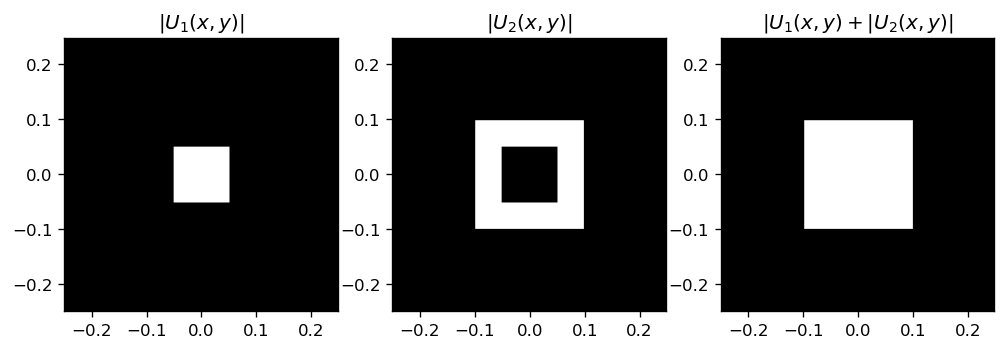

In [ ]:
z1=1000
z2=50000
z3=4000
z4=20000
import scipy.special as ss


L=0.5
M=250.
dx=L/M
wl=0.5E-6
z=5.
w=0.01
dxc=z*wl/L
Mc=L/dxc
zc=dx*L/wl

x1=np.linspace(-L/2, L/2-dx,int(M))
y1=np.linspace(-L/2, L/2-dx,int(M))
xx1, yy1= np.meshgrid(x1,y1)

x2=x1
y2=y1
xx2, yy2 = np.meshgrid(x2,y2);



u1=rect2D(x1/0.1,y1/0.1)
u2=rect2D(x1/0.2,y1/0.2)
u2=u2-u1
ut=u1+u2



Hftas=ASft(M,M,dx,wl,z1)
Hftfr=ftfresnel(M,M,dx,wl,z1)

u2ftas=convft(u1,Hftas,dx)
u2ftfr=convft(u1,Hftfr,dx)

fig = plt.figure(dpi=120)

ax = fig.add_subplot(1, 3, 1)
ax.imshow(np.abs(u1)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_1(x,y)|$')
ax = fig.add_subplot(1, 3,2)
ax.imshow(np.abs(u2)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$')
ax = fig.add_subplot(1, 3,3)
ax.imshow(np.abs(ut)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_1(x,y)+|U_2(x,y)|$')

Probemos el funcionamiento en distancias cortas usando el propagador de Fresnel con Funcion de Transferencia y el de Espectro Angular

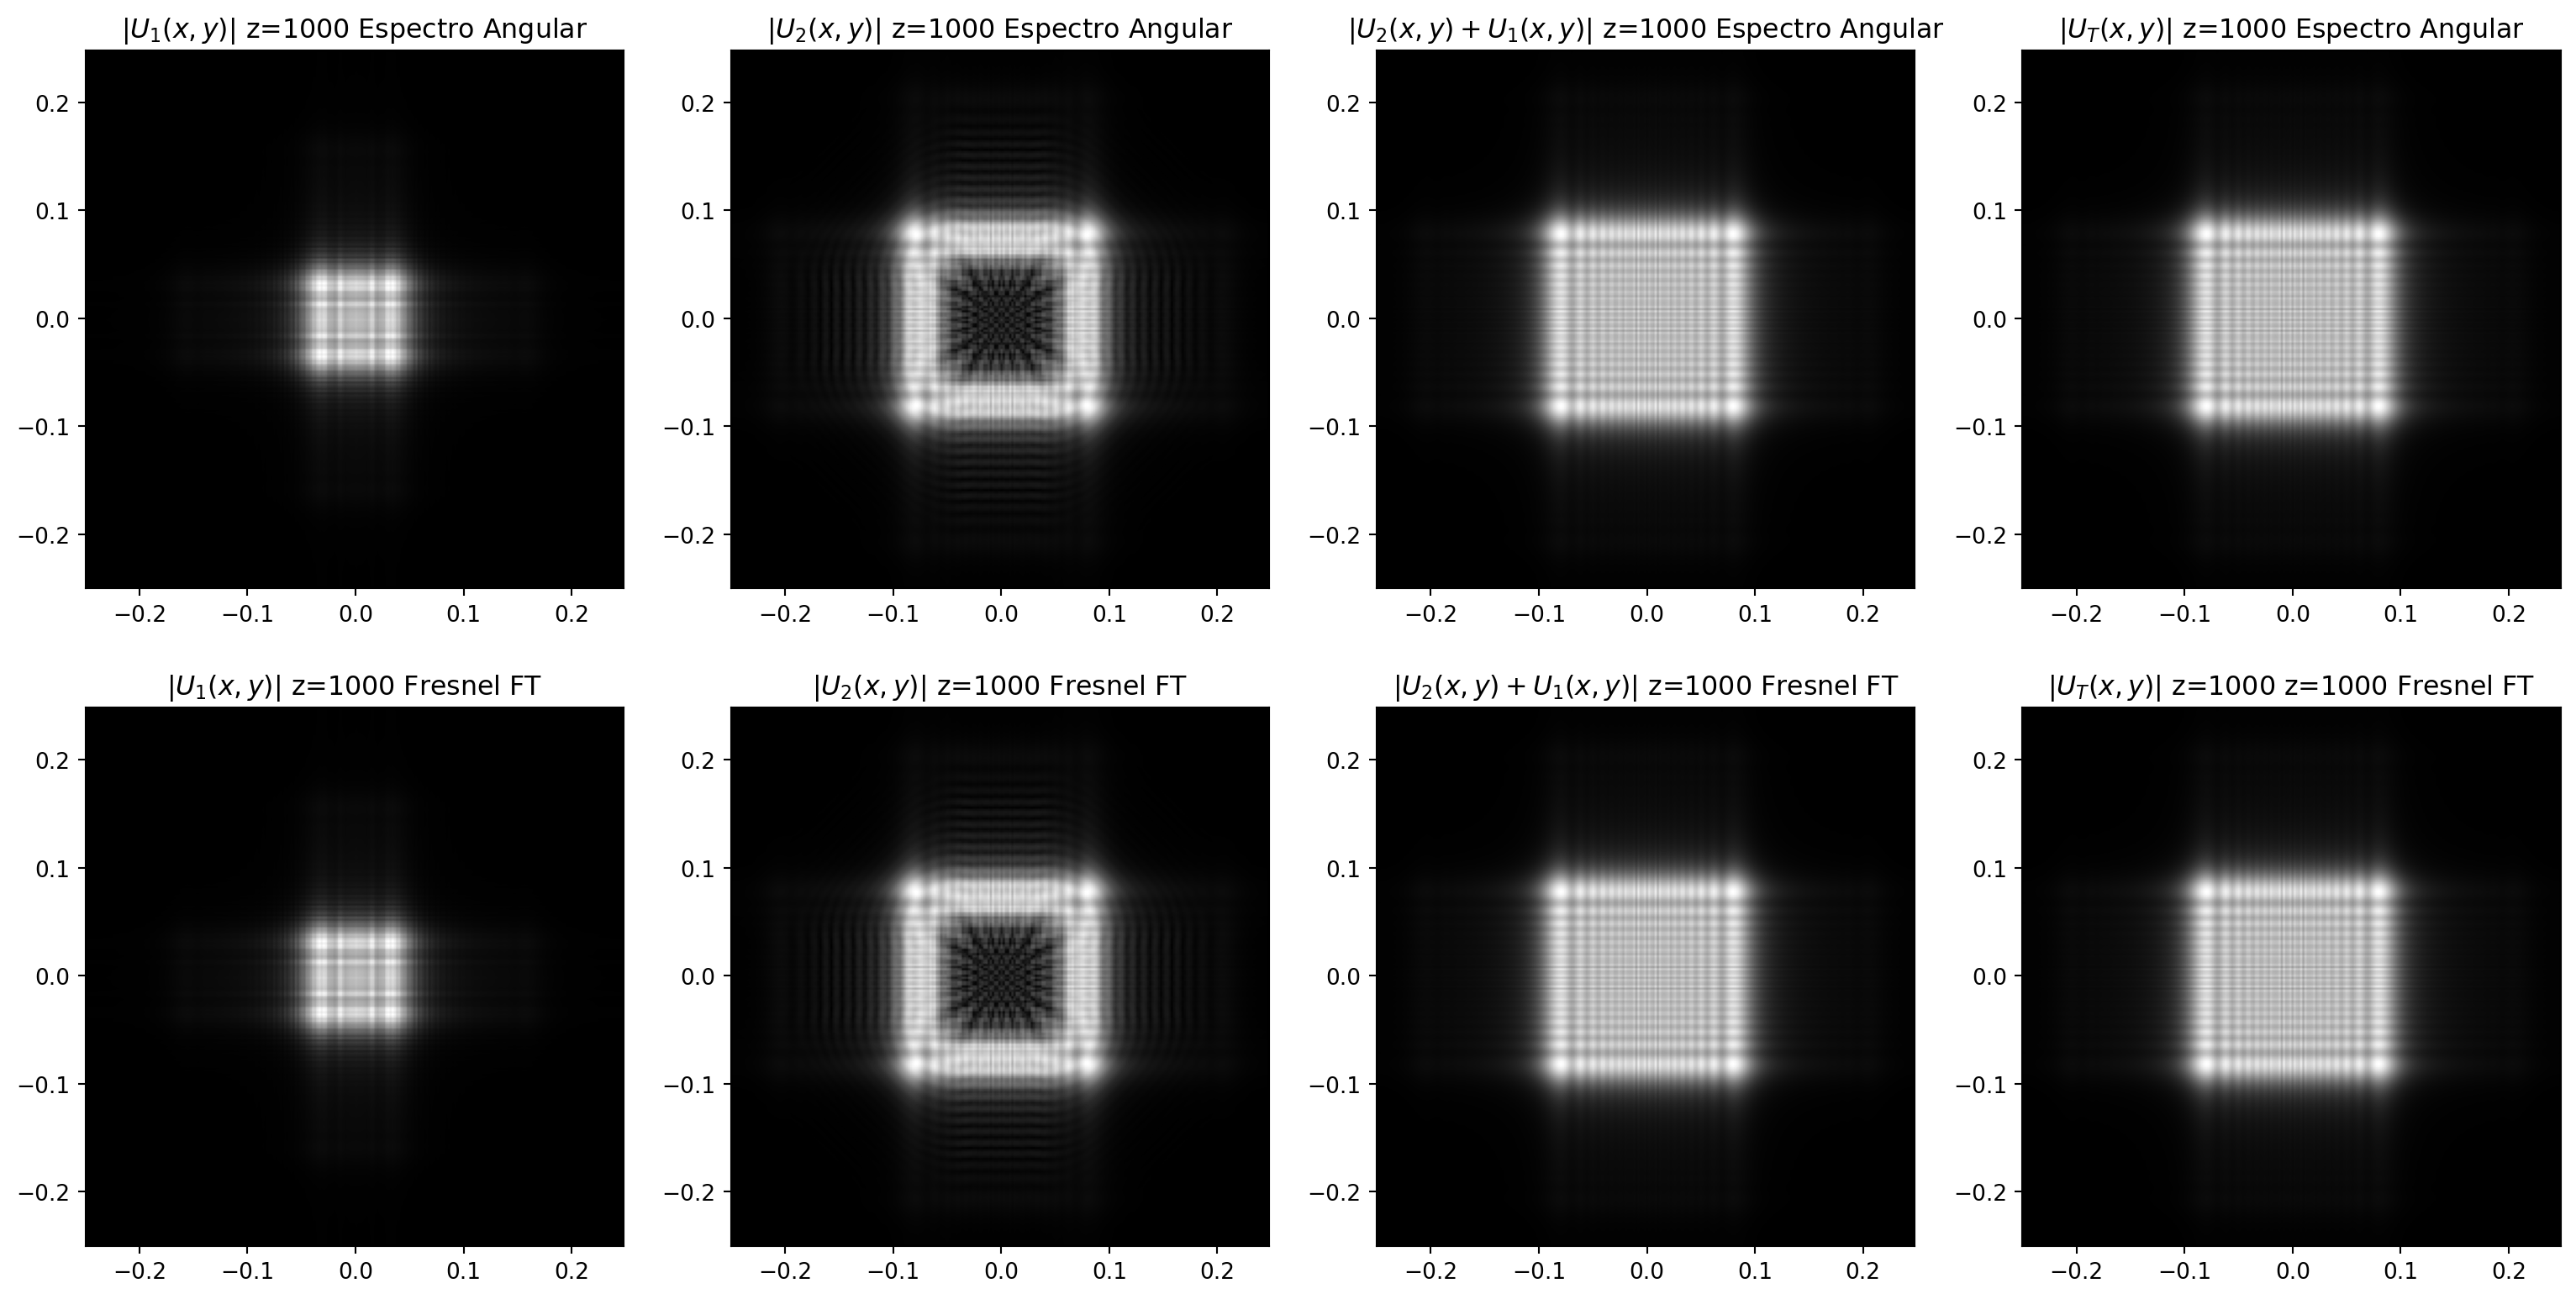

In [ ]:
u2ftas1=convft(u1,Hftas,dx)
u2ftas2=convft(u2,Hftas,dx)
u2ftasT=convft(ut,Hftas,dx)
u2ftfr1=convft(u1,Hftfr,dx)
u2ftfr2=convft(u2,Hftfr,dx)
u2ftfrT=convft(ut,Hftfr,dx)

u2ftfrTf=u2ftfr1+u2ftfr2
u2ftasTf=u2ftas2+u2ftas1

plt.rcParams['figure.figsize'] = 20,10
fig = plt.figure(dpi=190)

ax = fig.add_subplot(2, 4, 1)
ax.imshow(np.abs(u2ftas1)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_1(x,y)|$ z=1000 Espectro Angular')
ax = fig.add_subplot(2, 4,2)
ax.imshow(np.abs(u2ftas2)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=1000 Espectro Angular')
ax = fig.add_subplot(2, 4,3)
ax.imshow(np.abs(u2ftasTf)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)+U_1(x,y)|$ z=1000 Espectro Angular')
ax = fig.add_subplot(2, 4,4)
ax.imshow(np.abs(u2ftasT)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_T(x,y)|$ z=1000 Espectro Angular')

ax = fig.add_subplot(2, 4,5)
ax.imshow(np.abs(u2ftfr1)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_1(x,y)|$ z=1000 Fresnel FT')
ax = fig.add_subplot(2, 4,6)
ax.imshow(np.abs(u2ftfr2)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)|$ z=1000 Fresnel FT')
ax = fig.add_subplot(2, 4,7)
ax.imshow(np.abs(u2ftfrTf)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_2(x,y)+U_1(x,y)|$ z=1000 Fresnel FT')
ax = fig.add_subplot(2, 4,8)
ax.imshow(np.abs(u2ftfrT)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$|U_T(x,y)|$ z=1000 z=1000 Fresnel FT')

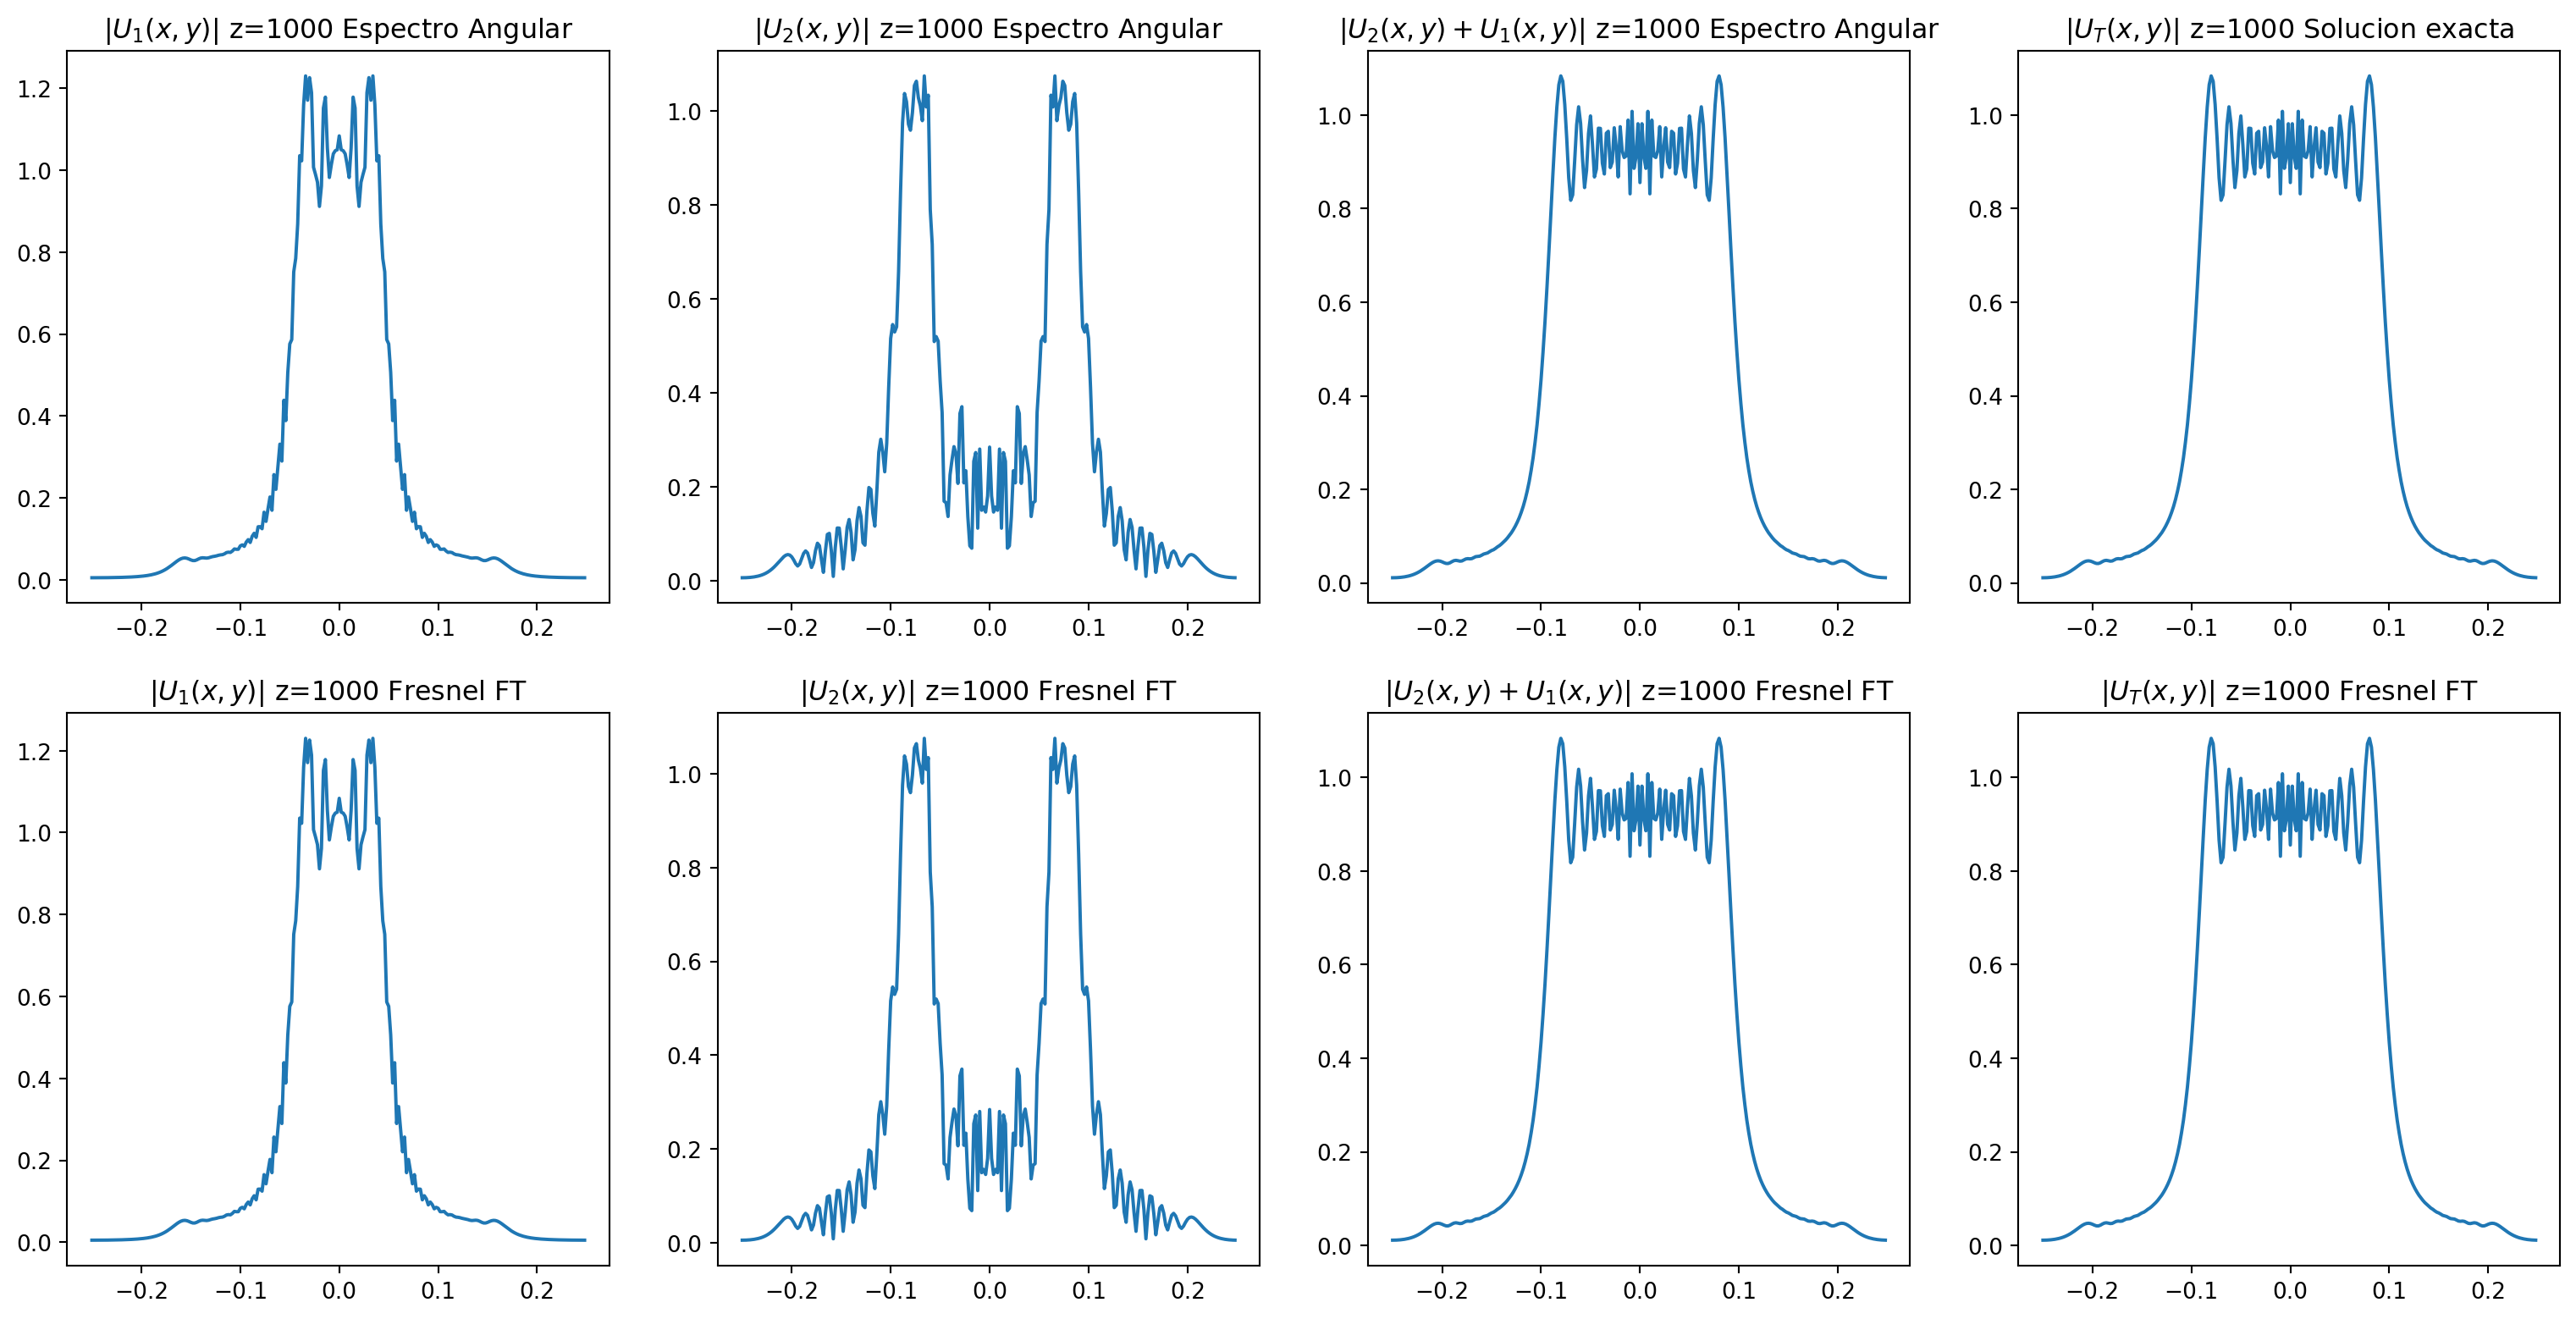

In [ ]:
plt.rcParams['figure.figsize'] = 20,10
fig = plt.figure(dpi=190)

ax = fig.add_subplot(2, 4, 1)
ax.plot(x1,np.abs(u2ftas1)[125,:]**(1))
ax.title.set_text('$|U_1(x,y)|$ z=1000 Espectro Angular')
ax = fig.add_subplot(2, 4,2)
ax.plot(x1,np.abs(u2ftas2)[125,:]**(1))
ax.title.set_text('$|U_2(x,y)|$ z=1000 Espectro Angular')
ax = fig.add_subplot(2, 4,3)
ax.plot(x1,np.abs(u2ftasTf)[125,:]**(1))
ax.title.set_text('$|U_2(x,y)+U_1(x,y)|$ z=1000 Espectro Angular')
ax = fig.add_subplot(2, 4,4)
ax.plot(x1,np.abs(u2ftasT)[125,:]**(1))
ax.title.set_text('$|U_T(x,y)|$ z=1000 Solucion exacta')

ax = fig.add_subplot(2, 4,5)
ax.plot(x1,np.abs(u2ftfr1)[125,:]**(1))
ax.title.set_text('$|U_1(x,y)|$ z=1000 Fresnel FT')
ax = fig.add_subplot(2, 4,6)
ax.plot(x1,np.abs(u2ftfr2)[125,:]**(1))
ax.title.set_text('$|U_2(x,y)|$ z=1000 Fresnel FT')
ax = fig.add_subplot(2, 4,7)
ax.plot(x1,np.abs(u2ftfrTf)[125,:]**(1))
ax.title.set_text('$|U_2(x,y)+U_1(x,y)|$ z=1000 Fresnel FT')
ax = fig.add_subplot(2, 4,8)
ax.plot(x1,np.abs(u2ftfrT)[125,:]**(1))
ax.title.set_text('$|U_T(x,y)|$ z=1000 Fresnel FT')

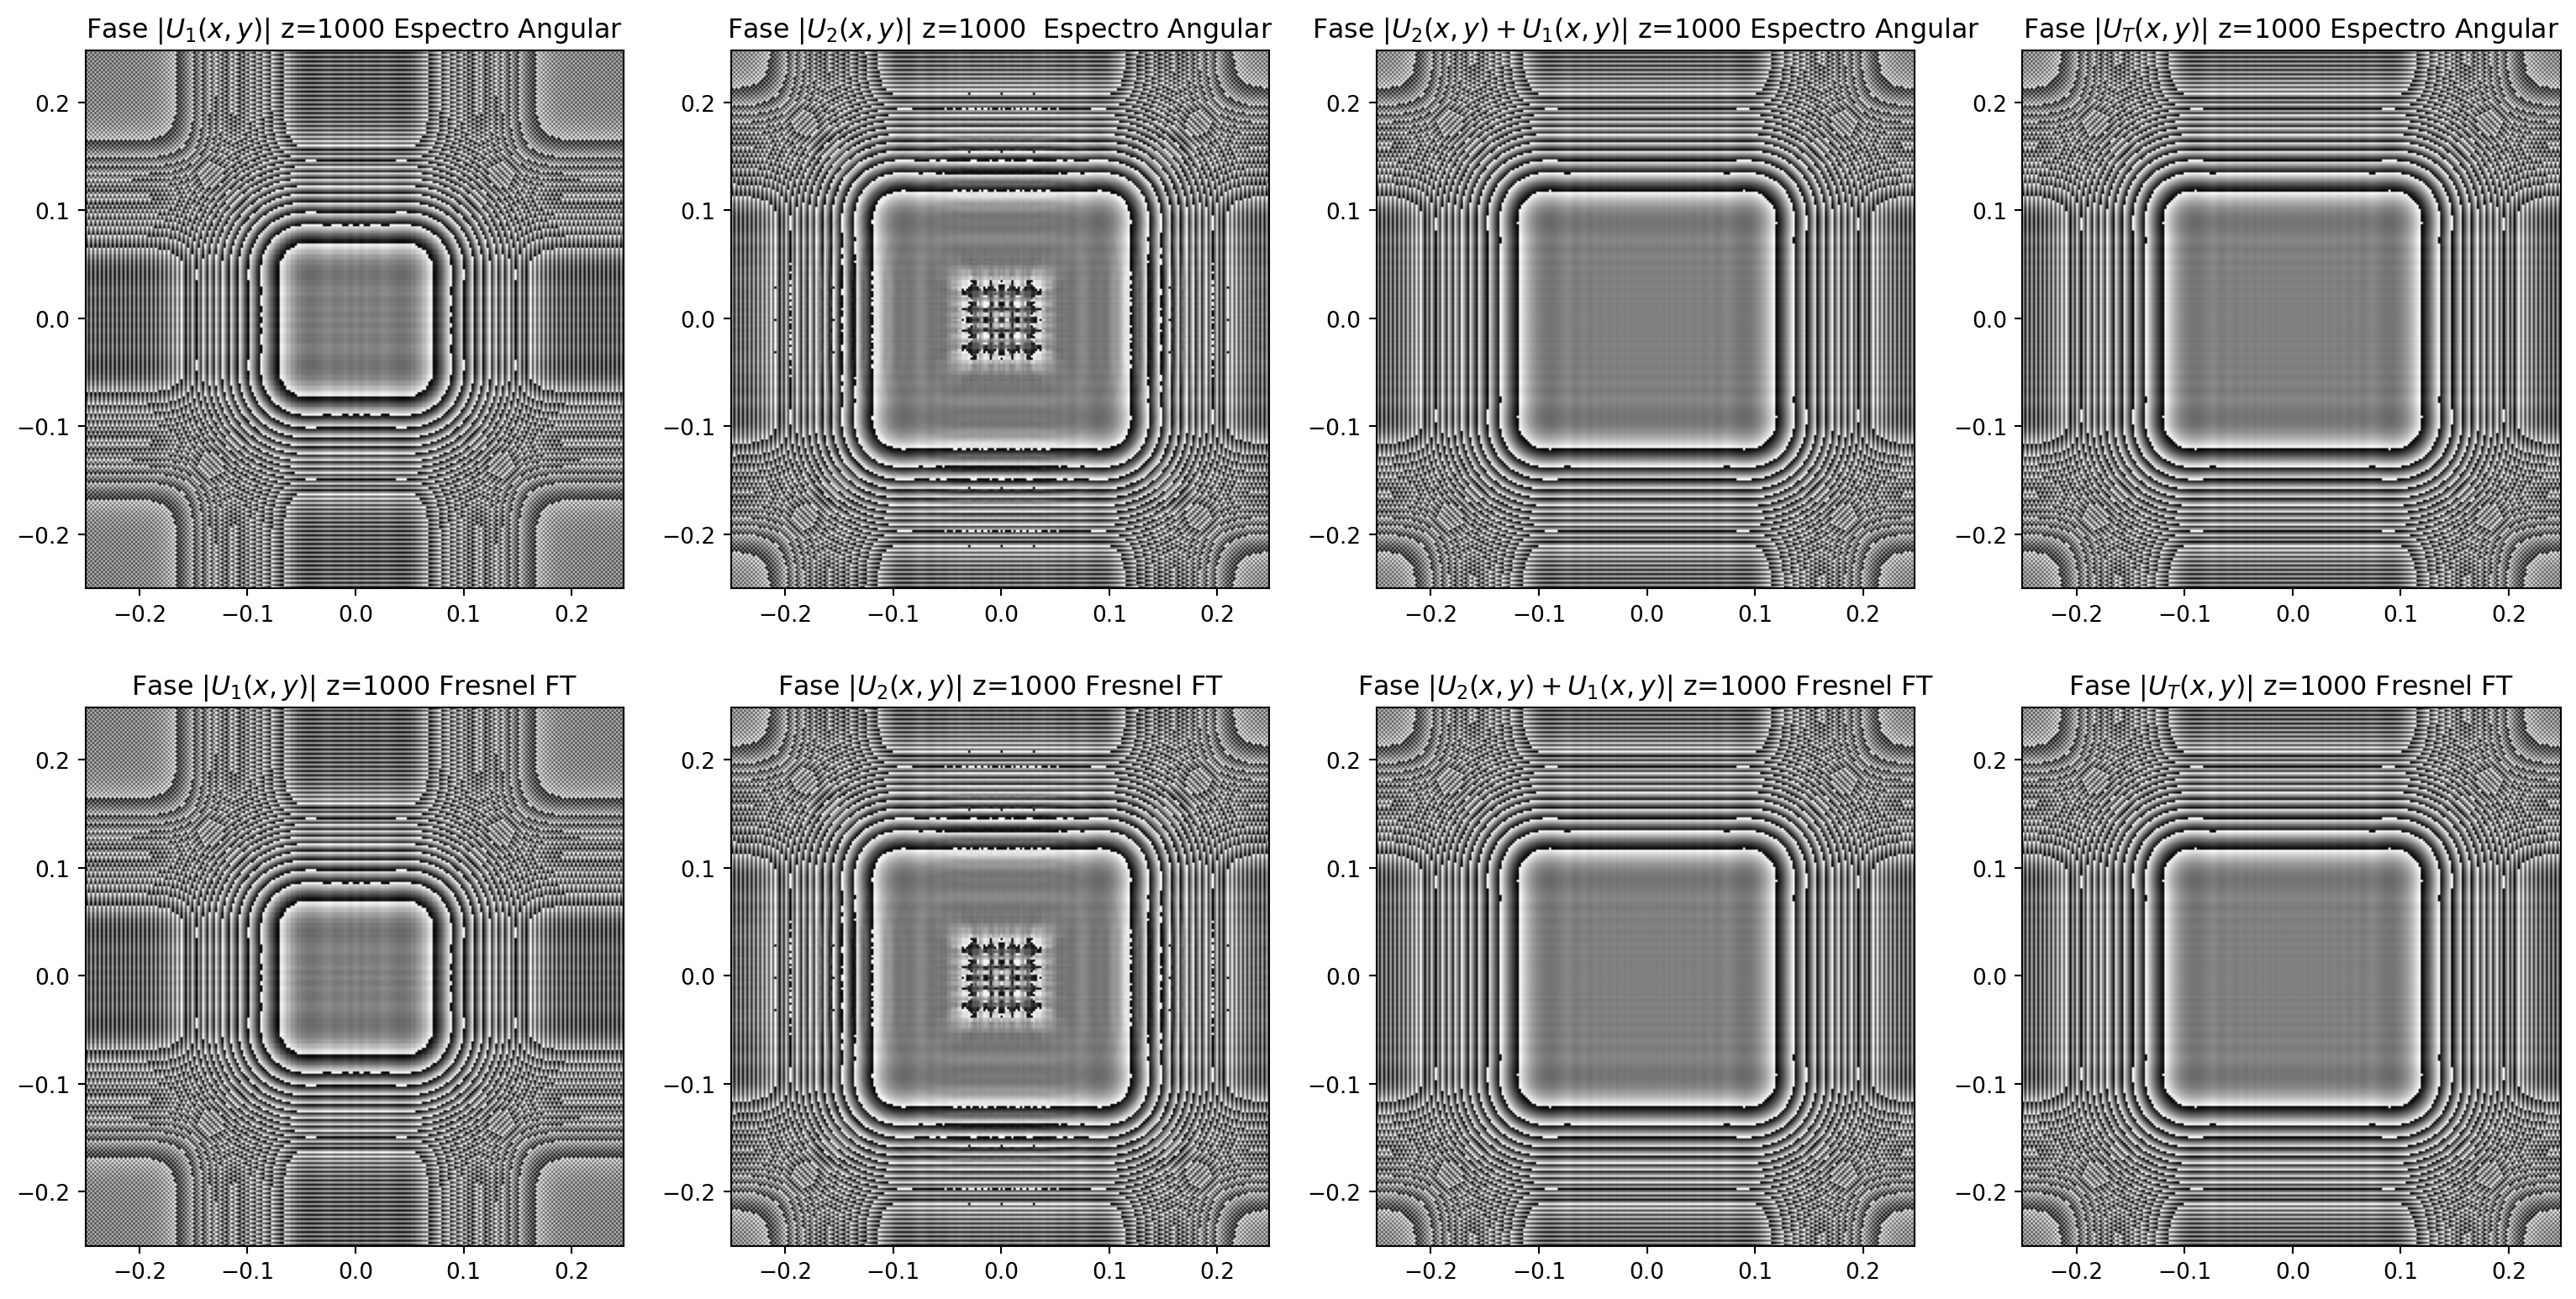

In [ ]:
plt.rcParams['figure.figsize'] = 20,10
fig = plt.figure(dpi=190)

ax = fig.add_subplot(2, 4, 1)
ax.imshow(np.angle(u2ftas1)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $|U_1(x,y)|$ z=1000 Espectro Angular')
ax = fig.add_subplot(2, 4,2)
ax.imshow(np.angle(u2ftas2)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $|U_2(x,y)|$ z=1000  Espectro Angular')
ax = fig.add_subplot(2, 4,3)
ax.imshow(np.angle(u2ftasTf)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $|U_2(x,y)+U_1(x,y)|$ z=1000 Espectro Angular')
ax = fig.add_subplot(2, 4,4)
ax.imshow(np.angle(u2ftasT)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $|U_T(x,y)|$ z=1000 Espectro Angular')

ax = fig.add_subplot(2, 4,5)
ax.imshow(np.angle(u2ftfr1)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $|U_1(x,y)|$ z=1000 Fresnel FT')
ax = fig.add_subplot(2, 4,6)
ax.imshow(np.angle(u2ftfr2)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $|U_2(x,y)|$ z=1000 Fresnel FT')
ax = fig.add_subplot(2, 4,7)
ax.imshow(np.angle(u2ftfrTf)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $|U_2(x,y)+U_1(x,y)|$ z=1000 Fresnel FT')
ax = fig.add_subplot(2, 4,8)
ax.imshow(np.angle(u2ftfrT)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $|U_T(x,y)|$ z=1000 Fresnel FT')

Finalmente, comparemos la propagacion de un cuadrado con ambos propagadores con la solucion exacta usando las integrales de Fresnel

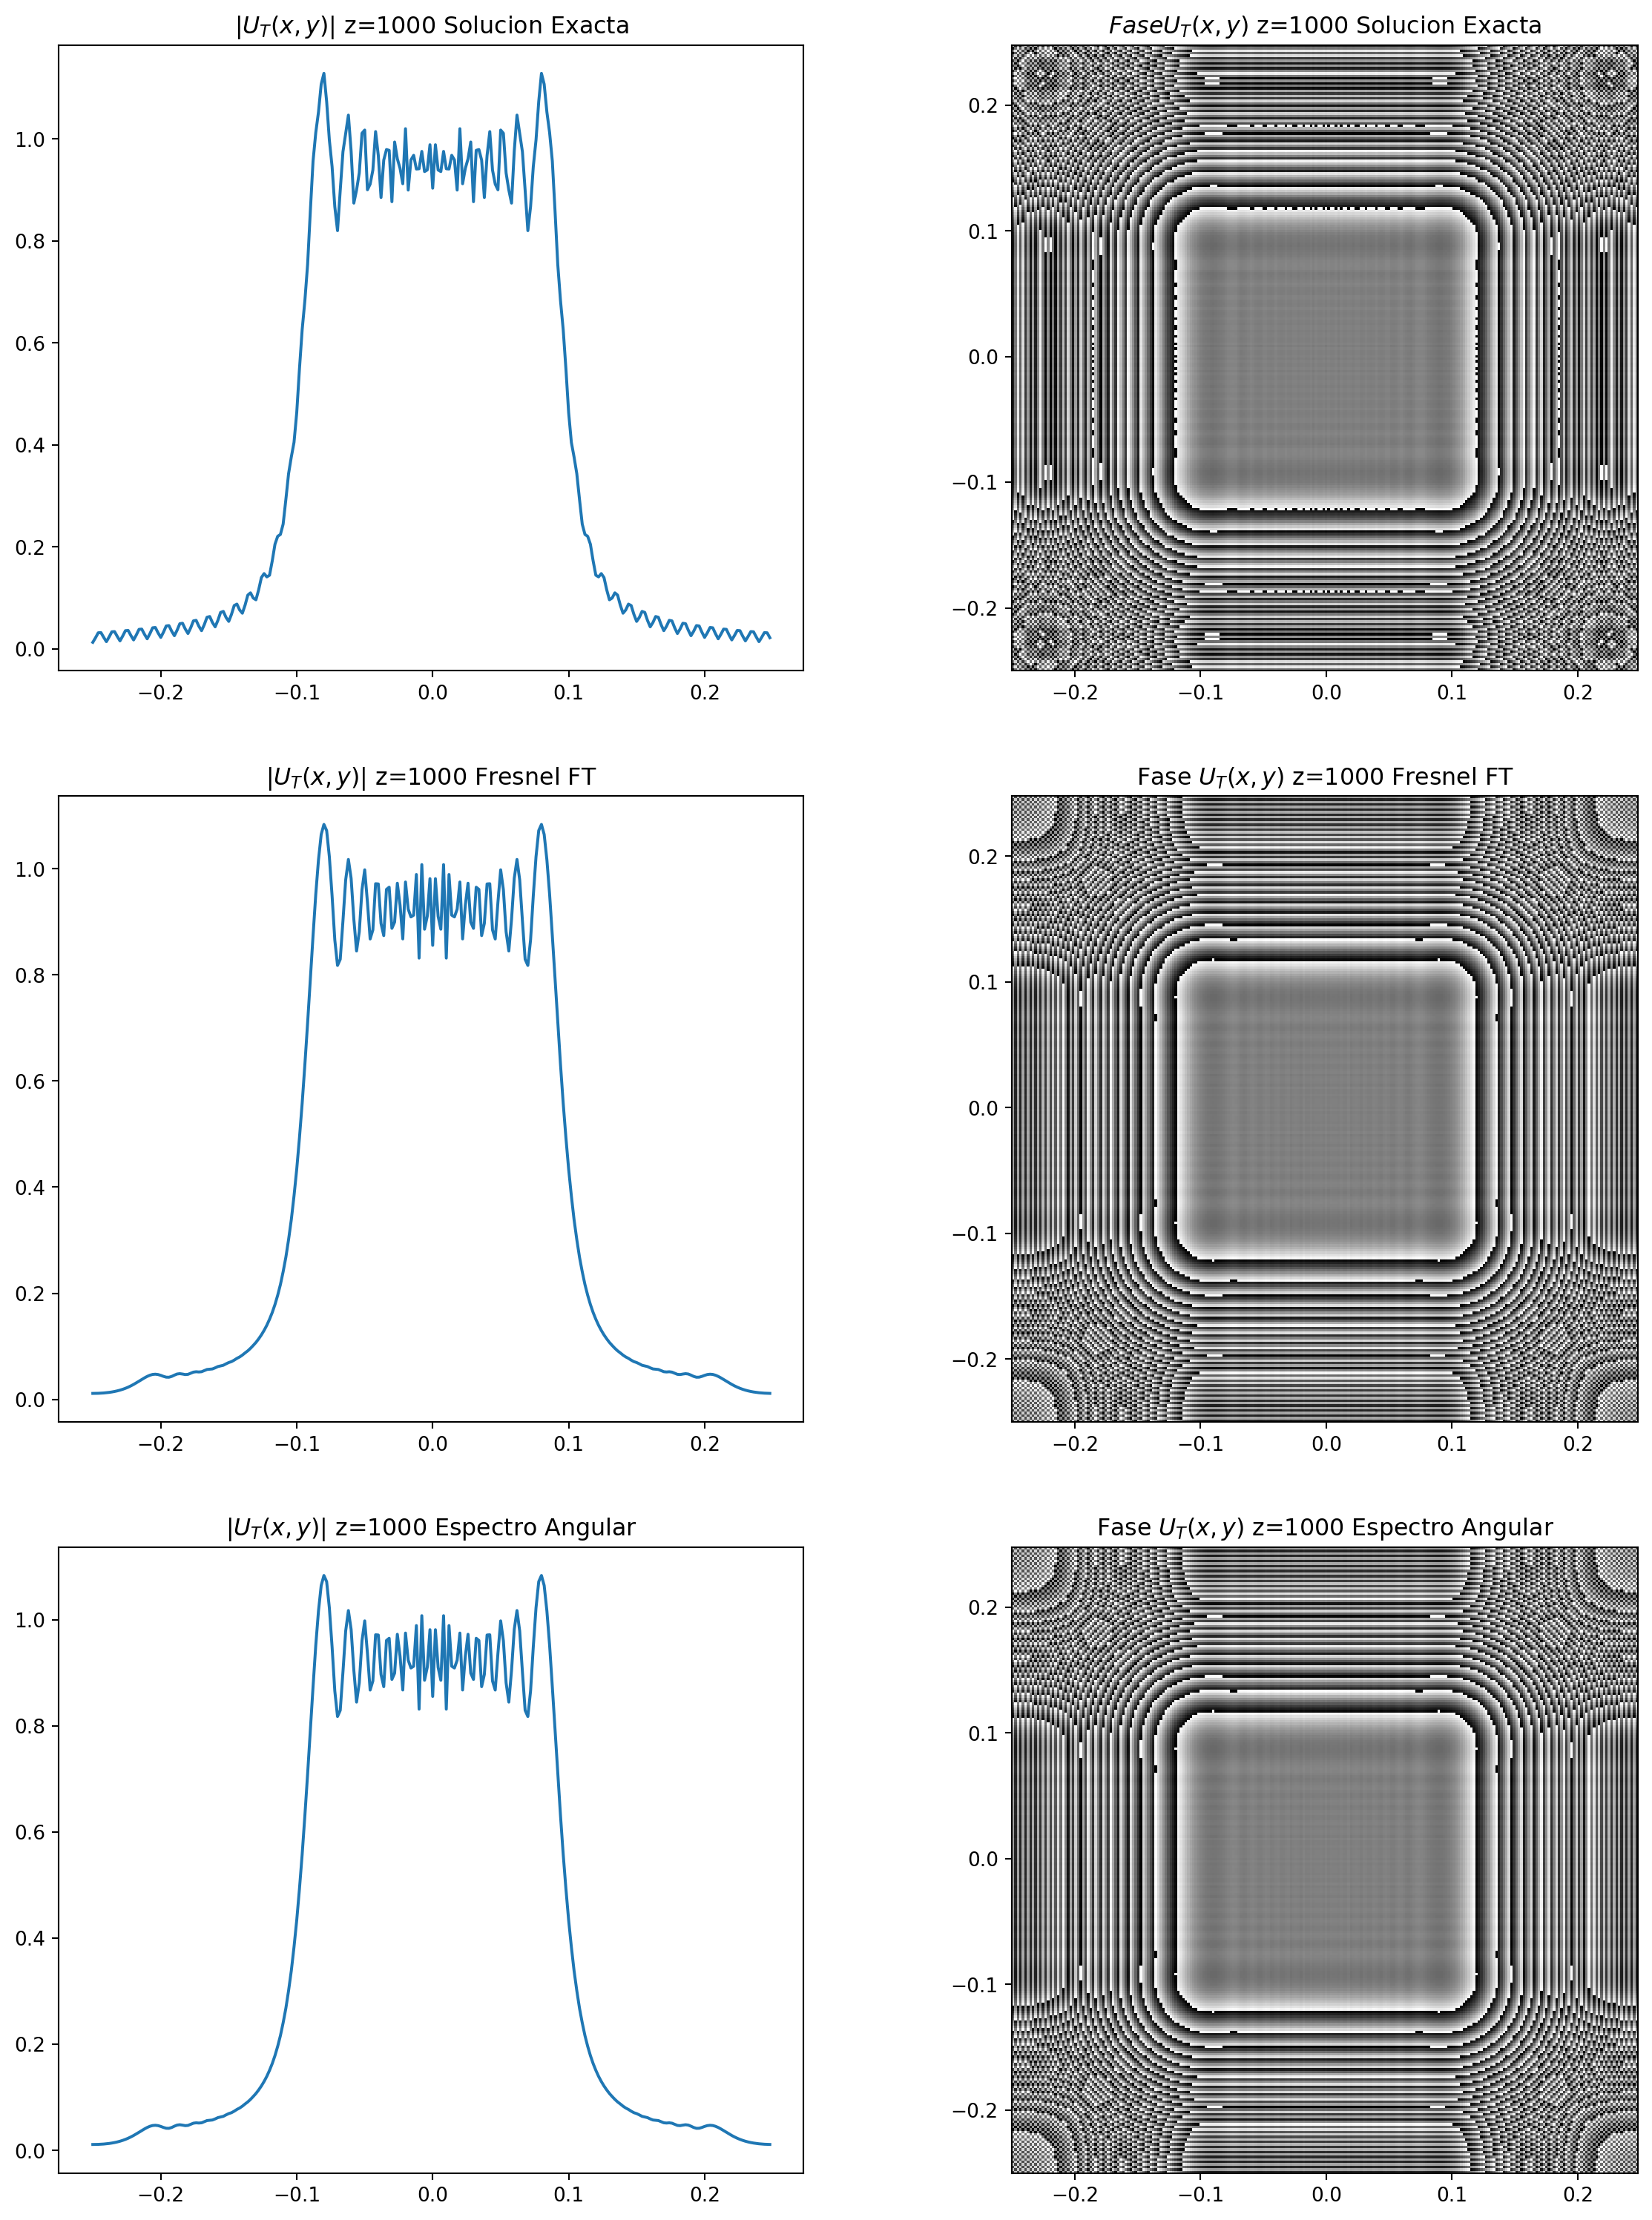

In [ ]:
def Rectpropexac(x,y,w,wl,z):
    
    k=(2*np.pi)/wl
    a1=-np.sqrt(2/(wl*z))*(w+x)
    a2=np.sqrt(2/(wl*z))*(w-x)
    b1=-np.sqrt(2/(wl*z))*(w+y)
    b2=np.sqrt(2/(wl*z))*(w-y)
    sa1,ca1=ss.fresnel(a1)
    sa2,ca2=ss.fresnel(a2)
    sb1,cb1=ss.fresnel(b1)
    sb2,cb2=ss.fresnel(b2)
    
    u2=(np.exp(1j*k*z))/(2*1j)*(((ca2-ca1)+1j*(sa2-sa1))*((cb2-cb1)+1j*(sb2-sb1)))
    return u2



Exres=Rectpropexac(xx1,yy1,0.10,wl,z1)


fig = plt.figure(dpi=190)


plt.rcParams['figure.figsize'] = 15,20
ax = fig.add_subplot(3, 2, 1)
ax.plot(x1,np.abs(Exres)[125,:]**(1))
ax.title.set_text('$|U_T(x,y)|$ z=1000 Solucion Exacta')

ax = fig.add_subplot(3, 2, 2)
ax.imshow(np.angle(Exres)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('$Fase U_T(x,y)$ z=1000 Solucion Exacta')

ax = fig.add_subplot(3, 2, 3)
ax.plot(x1,np.abs(u2ftfrT)[125,:]**(1))
ax.title.set_text('$|U_T(x,y)|$ z=1000 Fresnel FT')

ax = fig.add_subplot(3, 2, 4)
ax.imshow(np.angle(u2ftfrT)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $U_T(x,y)$ z=1000 Fresnel FT')

ax = fig.add_subplot(3, 2, 5)
ax.plot(x1,np.abs(u2ftfrT)[125,:]**(1))
ax.title.set_text('$|U_T(x,y)|$ z=1000 Espectro Angular')

ax = fig.add_subplot(3, 2, 6)
ax.imshow(np.angle(u2ftfrT)**(1), cmap='gray',extent=[np.min(x2),np.max(x2),np.min(y2),np.max(y2)])
ax.title.set_text('Fase $U_T(x,y)$ z=1000 Espectro Angular')